In [ ]:
%%capture
!pip install transformers
!pip install gdown

In [ ]:
import torch
from transformers import AutoTokenizer,BertTokenizerFast
from google.colab import userdata
HF_token = userdata.get('HF-token')

In [ ]:
!huggingface-cli login --token {HF_token}

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# Model 1 - Fined Tuned by Me (Nisarg)


import gdown

url = 'https://drive.google.com/uc?id=1-AVV2ncybRDwkFJo0Q8BJigDYwbp00uv'
output = 'finetuned_model_4.pt'
gdown.download(url, output, quiet=False)

import torch
from transformers import AutoTokenizer

# Define the BERT tokenizer
custom_model_tokenizer_N = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load the fine-tuned model
custom_model_N = torch.load('finetuned_model_4.pt', map_location=torch.device('cpu'))
custom_model_N.eval()


Downloading...
From: https://drive.google.com/uc?id=1-AVV2ncybRDwkFJo0Q8BJigDYwbp00uv
To: /content/finetuned_model_4.pt
100%|██████████| 436M/436M [00:11<00:00, 37.8MB/s]


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [ ]:
# Model 2 - Fined Tuned by George

import gdown
import torch
from transformers import AutoTokenizer, BertForQuestionAnswering
import zipfile

# Google Drive zip file link
url = 'https://drive.google.com/uc?id=1cnCiHUvSdyfOhFSYcTR8FW5e7aSsxqwl'
output = 'model_files.zip'
gdown.download(url, output, quiet=False)

# Unzip the file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('model_files_G')

# Adjusted path pointing to the directory that contains the model files
model_path_custom_G = 'model_files_G/Bert-Base-FineTuned/'

# Load the model
custom_model_G = BertForQuestionAnswering.from_pretrained(model_path_custom_G)
custom_model_tokenizer_G = BertTokenizerFast.from_pretrained(model_path_custom_G)

custom_model_G.eval()


Downloading...
From: https://drive.google.com/uc?id=1cnCiHUvSdyfOhFSYcTR8FW5e7aSsxqwl
To: /content/model_files.zip
100%|██████████| 404M/404M [00:03<00:00, 120MB/s] 


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [ ]:
# Model 3 - Fined Tuned by Hugging Face

from transformers import AutoTokenizer, BertForQuestionAnswering

# Define the bert tokenizer
tokenizer_Fined_Tuned = AutoTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

# Load the fine-tuned modeol
fine_tuned_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
fine_tuned_model.eval()

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), ep

In [ ]:
# Model 4 - UnFined Tuned by Hugging Face

from transformers import AutoTokenizer, BertForQuestionAnswering

# Define the bert tokenizer for the base, unfine-tuned model
base_model_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load the base, unfine-tuned BERT model
base_model = BertForQuestionAnswering.from_pretrained('bert-base-uncased')
base_model.eval()

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [ ]:
def predict(model, tokenizer, context, query):
    inputs = tokenizer.encode_plus(query, context, return_tensors='pt')
    outputs = model(**inputs)
    answer_start = torch.argmax(outputs.start_logits, dim=1)  # assuming model outputs start_logits
    answer_end = torch.argmax(outputs.end_logits, dim=1) + 1   # assuming model outputs end_logits

    answer = tokenizer.convert_tokens_to_string(
        tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end])
    )

    return answer

In [ ]:
def normalize_text(s):
  """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
  import string, re

  def remove_articles(text):
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    return re.sub(regex, " ", text)

  def white_space_fix(text):
    return " ".join(text.split())

  def remove_punc(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)

  def lower(text):
    return text.lower()

  return white_space_fix(remove_articles(remove_punc(lower(s))))

In [ ]:
def compute_exact_match(prediction, truth):
    return int(normalize_text(prediction) == normalize_text(truth))

In [ ]:
def compute_f1(prediction, truth):
  pred_tokens = normalize_text(prediction).split()
  truth_tokens = normalize_text(truth).split()

  # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
  if len(pred_tokens) == 0 or len(truth_tokens) == 0:
    return int(pred_tokens == truth_tokens)

  common_tokens = set(pred_tokens) & set(truth_tokens)

  # if there are no common tokens then f1 = 0
  if len(common_tokens) == 0:
    return 0

  prec = len(common_tokens) / len(pred_tokens)
  rec = len(common_tokens) / len(truth_tokens)

  return 2 * (prec * rec) / (prec + rec)

In [ ]:
def give_an_answer(model_name, model, tokenizer, context, query, answer):
    prediction = predict(model, tokenizer, context, query)
    em_score = compute_exact_match(prediction, answer)
    f1_score = compute_f1(prediction, answer)

    result = {
        "Model": model_name,
        "Question": query,
        "Prediction": prediction,
        "True Answer": answer,
        "EM": em_score,
        "F1": f1_score
    }

    print(f"#### {model_name} ####")
    print(f"Question: {query}")
    print(f"Prediction: {prediction}")
    print(f"True Answer: {answer}")
    print(f"EM: {em_score}")
    print(f"F1: {f1_score}")
    print("\n")

    return result

# Comparing Models

In [ ]:
# Initialize a global list to store results
results = []

In [ ]:
context = "Hi! My name is Alexa and I am 21 years old. I used to live in Peristeri of Athens, but now I moved on in Kaisariani of Athens."

queries = ["How old is Alexa?",
           "Where does Alexa live now?",
           "Where Alexa used to live?"
          ]
answers = ["21",
           "Kaisariani of Athens",
           "Peristeri of Athens"
          ]

# For Custom Model and Fine Tuned Model
for q,a in zip(queries,answers):
  custom_result_N = give_an_answer("Custom_Model_N", custom_model_N,custom_model_tokenizer_N, context, q, a)
  custom_result_G = give_an_answer("Custom_Model_G", custom_model_G,custom_model_tokenizer_G, context, q, a)
  fine_tuned_result = give_an_answer("Fine Tuned Model", fine_tuned_model, tokenizer_Fined_Tuned, context, q, a)
  base_model_result = give_an_answer("Base Model", base_model, base_model_tokenizer, context, q, a)


  # Append results to the global list
  results.append(custom_result_N)
  results.append(custom_result_G)
  results.append(fine_tuned_result)
  results.append(base_model_result)

#### Custom_Model_N ####
Question: How old is Alexa?
Prediction: 21
True Answer: 21
EM: 1
F1: 1.0


#### Custom_Model_G ####
Question: How old is Alexa?
Prediction: 21
True Answer: 21
EM: 1
F1: 1.0


#### Fine Tuned Model ####
Question: How old is Alexa?
Prediction: 21
True Answer: 21
EM: 1
F1: 1.0


#### Base Model ####
Question: How old is Alexa?
Prediction: am 21 years old. i used
True Answer: 21
EM: 0
F1: 0.2857142857142857


#### Custom_Model_N ####
Question: Where does Alexa live now?
Prediction: kaisariani
True Answer: Kaisariani of Athens
EM: 0
F1: 0.5


#### Custom_Model_G ####
Question: Where does Alexa live now?
Prediction: kaisariani
True Answer: Kaisariani of Athens
EM: 0
F1: 0.5


#### Fine Tuned Model ####
Question: Where does Alexa live now?
Prediction: kaisariani of athens
True Answer: Kaisariani of Athens
EM: 1
F1: 1.0


#### Base Model ####
Question: Where does Alexa live now?
Prediction: 
True Answer: Kaisariani of Athens
EM: 0
F1: 0


#### Custom_Model_N ####
Quest

In [ ]:
context = """ Harry Potter is a series of seven fantasy novels written by British author, J. K. Rowling. The novels chronicle the lives of a young wizard,
              Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry.
              The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard
              governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people). Since the release of the first novel,
              Harry Potter and the Philosopher's Stone, on 26 June 1997, the books have found immense popularity, positive reviews, and commercial success worldwide.
              They have attracted a wide adult audience as well as younger readers and are often considered cornerstones of modern young adult literature.[2]
              As of February 2018, the books have sold more than 500 million copies worldwide, making them the best-selling book series in history, and have been translated
              into eighty languages.[3] The last four books consecutively set records as the fastest-selling books in history, with the final installment selling roughly
              eleven million copies in the United States within twenty-four hours of its release.  """

queries = [
           "Who wrote Harry Potter's novels?",
           "Who are Harry Potter's friends?",
           "Who is the enemy of Harry Potter?",
           "What are Muggles?",
           "Which is the name of Harry Poter's first novel?",
           "When did the first novel release?",
           "Who was attracted by Harry Potter novels?",
           "How many languages Harry Potter has been translated into? "
          ]
answers = [
           "J. K. Rowling",
           "Hermione Granger and Ron Weasley",
           "Lord Voldemort",
           "non-magical people",
           "Harry Potter and the Philosopher's Stone",
           "26 June 1997",
           "a wide adult audience as well as younger readers",
           "eighty"
          ]

# For Custom Model and Fine Tuned Model
for q,a in zip(queries,answers):
  custom_result_N = give_an_answer("Custom_Model_N", custom_model_N,custom_model_tokenizer_N, context, q, a)
  custom_result_G = give_an_answer("Custom_Model_G", custom_model_G,custom_model_tokenizer_G, context, q, a)
  fine_tuned_result = give_an_answer("Fine Tuned Model", fine_tuned_model, tokenizer_Fined_Tuned, context, q, a)
  base_model_result = give_an_answer("Base Model", base_model, base_model_tokenizer, context, q, a)


  # Append results to the global list
  results.append(custom_result_N)
  results.append(custom_result_G)
  results.append(fine_tuned_result)
  results.append(base_model_result)

#### Custom_Model_N ####
Question: Who wrote Harry Potter's novels?
Prediction: j. k. rowling.
True Answer: J. K. Rowling
EM: 1
F1: 1.0


#### Custom_Model_G ####
Question: Who wrote Harry Potter's novels?
Prediction: j. k. rowling
True Answer: J. K. Rowling
EM: 1
F1: 1.0


#### Fine Tuned Model ####
Question: Who wrote Harry Potter's novels?
Prediction: j. k. rowling
True Answer: J. K. Rowling
EM: 1
F1: 1.0


#### Base Model ####
Question: Who wrote Harry Potter's novels?
Prediction: 
True Answer: J. K. Rowling
EM: 0
F1: 0


#### Custom_Model_N ####
Question: Who are Harry Potter's friends?
Prediction: hermione granger and ron weasley,
True Answer: Hermione Granger and Ron Weasley
EM: 1
F1: 1.0


#### Custom_Model_G ####
Question: Who are Harry Potter's friends?
Prediction: hermione granger and ron weasley
True Answer: Hermione Granger and Ron Weasley
EM: 1
F1: 1.0


#### Fine Tuned Model ####
Question: Who are Harry Potter's friends?
Prediction: hermione granger and ron weasley
True 

In [ ]:

context = """ The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic of coronavirus disease 2019 (COVID-19)
              caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China.
              The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic
              in March 2020. As of 6 February 2021, more than 105 million cases have been confirmed, with more than 2.3 million deaths attributed to COVID-19.
              Symptoms of COVID-19 are highly variable, ranging from none to severe illness. The virus spreads mainly through the air when people are
              near each other.[b] It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes.
              It may also spread via contaminated surfaces. People remain infectious for up to two weeks, and can spread the virus even if they do not show symptoms.[9]"""

queries = [
           "What is COVID-19?",
           "What is caused by COVID-19?",
           "How many cases have been confirmed from COVID-19?",
           "How many deaths have been confirmed from COVID-19?",
           "How is COVID-19 spread?",
           "How long can an infected person remain infected?",
           "Can a infected person spread the virus even if they don't have symptoms?",
           "What do elephants eat?"
          ]
answers = [
           "an ongoing pandemic of coronavirus disease 2019",
           "severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)",
           "more than 105 million cases",
           "more than 2.3 million deaths",
           "mainly through the air when people are near each other. It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. It may also spread via contaminated surfaces.",
           "up to two weeks",
           "yes",
           ""
          ]

# For Custom Model and Fine Tuned Model
for q,a in zip(queries,answers):
  custom_result_N = give_an_answer("Custom_Model_N", custom_model_N,custom_model_tokenizer_N, context, q, a)
  custom_result_G = give_an_answer("Custom_Model_G", custom_model_G,custom_model_tokenizer_G, context, q, a)
  fine_tuned_result = give_an_answer("Fine Tuned Model", fine_tuned_model, tokenizer_Fined_Tuned, context, q, a)
  base_model_result = give_an_answer("Base Model", base_model, base_model_tokenizer, context, q, a)


  # Append results to the global list
  results.append(custom_result_N)
  results.append(custom_result_G)
  results.append(fine_tuned_result)
  results.append(base_model_result)

#### Custom_Model_N ####
Question: What is COVID-19?
Prediction: 
True Answer: an ongoing pandemic of coronavirus disease 2019
EM: 0
F1: 0


#### Custom_Model_G ####
Question: What is COVID-19?
Prediction: coronavirus disease
True Answer: an ongoing pandemic of coronavirus disease 2019
EM: 0
F1: 0.5


#### Fine Tuned Model ####
Question: What is COVID-19?
Prediction: an ongoing pandemic of coronavirus disease 2019
True Answer: an ongoing pandemic of coronavirus disease 2019
EM: 1
F1: 1.0


#### Base Model ####
Question: What is COVID-19?
Prediction: 
True Answer: an ongoing pandemic of coronavirus disease 2019
EM: 0
F1: 0


#### Custom_Model_N ####
Question: What is caused by COVID-19?
Prediction: severe acute respiratory syndrome
True Answer: severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
EM: 0
F1: 0.7272727272727273


#### Custom_Model_G ####
Question: What is caused by COVID-19?
Prediction: 
True Answer: severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
EM: 

In [ ]:

context = """ Queen are a British rock band formed in London in 1970. Their classic line-up was Freddie Mercury (lead vocals, piano),
            Brian May (guitar, vocals), Roger Taylor (drums, vocals) and John Deacon (bass). Their earliest works were influenced
            by progressive rock, hard rock and heavy metal, but the band gradually ventured into more conventional and radio-friendly
            works by incorporating further styles, such as arena rock and pop rock. """

queries = ["When did Queen found?",
           "Who were the basic members of Queen band?",
           "What kind of band they are?"
          ]
answers = ["1970",
           "Freddie Mercury, Brian May, Roger Taylor and John Deacon",
           "rock"
          ]


# For Custom Model and Fine Tuned Model
for q,a in zip(queries,answers):
  custom_result_N = give_an_answer("Custom_Model_N", custom_model_N,custom_model_tokenizer_N, context, q, a)
  custom_result_G = give_an_answer("Custom_Model_G", custom_model_G,custom_model_tokenizer_G, context, q, a)
  fine_tuned_result = give_an_answer("Fine Tuned Model", fine_tuned_model, tokenizer_Fined_Tuned, context, q, a)
  base_model_result = give_an_answer("Base Model", base_model, base_model_tokenizer, context, q, a)


  # Append results to the global list
  results.append(custom_result_N)
  results.append(custom_result_G)
  results.append(fine_tuned_result)
  results.append(base_model_result)

#### Custom_Model_N ####
Question: When did Queen found?
Prediction: 1970.
True Answer: 1970
EM: 1
F1: 1.0


#### Custom_Model_G ####
Question: When did Queen found?
Prediction: 1970
True Answer: 1970
EM: 1
F1: 1.0


#### Fine Tuned Model ####
Question: When did Queen found?
Prediction: 1970
True Answer: 1970
EM: 1
F1: 1.0


#### Base Model ####
Question: When did Queen found?
Prediction: 
True Answer: 1970
EM: 0
F1: 0


#### Custom_Model_N ####
Question: Who were the basic members of Queen band?
Prediction: freddie mercury ( lead vocals, piano ), brian may ( guitar, vocals ), roger taylor ( drums, vocals ) and john deacon ( bass ).
True Answer: Freddie Mercury, Brian May, Roger Taylor and John Deacon
EM: 0
F1: 0.6923076923076924


#### Custom_Model_G ####
Question: Who were the basic members of Queen band?
Prediction: freddie mercury ( lead vocals, piano ), brian may ( guitar, vocals ), roger taylor ( drums, vocals ) and john deacon ( bass )
True Answer: Freddie Mercury, Brian May, Ro

In [ ]:

context = """ Mount Olympus is the highest mountain in Greece. It is part of the Olympus massif near
              the Gulf of Thérmai of the Aegean Sea, located in the Olympus Range on the border between
              Thessaly and Macedonia, between the regional units of Pieria and Larissa, about 80 km (50 mi)
              southwest from Thessaloniki. Mount Olympus has 52 peaks and deep gorges. The highest peak,
              Mytikas, meaning "nose", rises to 2917 metres (9,570 ft). It is one of the
              highest peaks in Europe in terms of topographic prominence. """

queries = [
           "How many metres is Olympus?",
           "Where Olympus is near?",
           "How far away is Olympus from Thessaloniki?"
          ]
answers = [
           "2917",
           "Gulf of Thérmai of the Aegean Sea",
           "80 km (50 mi)"
          ]


# For Custom Model and Fine Tuned Model
for q,a in zip(queries,answers):
  custom_result_N = give_an_answer("Custom_Model_N", custom_model_N,custom_model_tokenizer_N, context, q, a)
  custom_result_G = give_an_answer("Custom_Model_G", custom_model_G,custom_model_tokenizer_G, context, q, a)
  fine_tuned_result = give_an_answer("Fine Tuned Model", fine_tuned_model, tokenizer_Fined_Tuned, context, q, a)
  base_model_result = give_an_answer("Base Model", base_model, base_model_tokenizer, context, q, a)


  # Append results to the global list
  results.append(custom_result_N)
  results.append(custom_result_G)
  results.append(fine_tuned_result)
  results.append(base_model_result)

#### Custom_Model_N ####
Question: How many metres is Olympus?
Prediction: 2917
True Answer: 2917
EM: 1
F1: 1.0


#### Custom_Model_G ####
Question: How many metres is Olympus?
Prediction: 2917
True Answer: 2917
EM: 1
F1: 1.0


#### Fine Tuned Model ####
Question: How many metres is Olympus?
Prediction: 2917
True Answer: 2917
EM: 1
F1: 1.0


#### Base Model ####
Question: How many metres is Olympus?
Prediction: 
True Answer: 2917
EM: 0
F1: 0


#### Custom_Model_N ####
Question: Where Olympus is near?
Prediction: mytikas,
True Answer: Gulf of Thérmai of the Aegean Sea
EM: 0
F1: 0


#### Custom_Model_G ####
Question: Where Olympus is near?
Prediction: 
True Answer: Gulf of Thérmai of the Aegean Sea
EM: 0
F1: 0


#### Fine Tuned Model ####
Question: Where Olympus is near?
Prediction: gulf of thermai of the aegean sea
True Answer: Gulf of Thérmai of the Aegean Sea
EM: 0
F1: 0.6666666666666666


#### Base Model ####
Question: Where Olympus is near?
Prediction: 
True Answer: Gulf of Thérmai 

In [ ]:
import pandas as pd

# Convert results list to a dataframe
df_results = pd.DataFrame(results)
df_results

,Model,Question,Prediction,True Answer,EM,F1
0,Custom_Model_N,How old is Alexa?,21,21,1,1.000000
1,Custom_Model_G,How old is Alexa?,21,21,1,1.000000
2,Fine Tuned Model,How old is Alexa?,21,21,1,1.000000
3,Base Model,How old is Alexa?,am 21 years old. i used,21,0,0.285714
4,Custom_Model_N,Where does Alexa live now?,kaisariani,Kaisariani of Athens,0,0.500000
...,...,...,...,...,...,...
95,Base Model,Where Olympus is near?,,Gulf of Thérmai of the Aegean Sea,0,0.000000
96,Custom_Model_N,How far away is Olympus from Thessaloniki?,,80 km (50 mi),0,0.000000
97,Custom_Model_G,How far away is Olympus from Thessaloniki?,80 km,80 km (50 mi),0,0.666667
98,Fine Tuned Model,How far away is Olympus from Thessaloniki?,80 km,80 km (50 mi),0,0.666667


In [ ]:
model_performance = df_results.groupby('Model').agg({
    'EM': 'mean',
    'F1': 'mean'
}).reset_index()

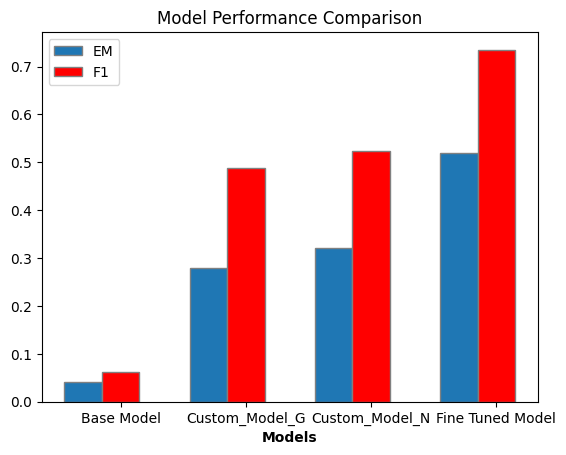

In [ ]:
import matplotlib.pyplot as plt

# Setting the bar width
barWidth = 0.3
r1 = range(len(model_performance))
r2 = [x + barWidth for x in r1]

# Plotting the bars
plt.bar(r1, model_performance['EM'], width=barWidth, edgecolor='grey', label='EM')
plt.bar(r2, model_performance['F1'], width=barWidth, edgecolor='grey', label='F1', color='r')

# Adding the model names as x-axis labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(model_performance))], model_performance['Model'])

# Adding title & legend
plt.title('Model Performance Comparison')
plt.legend()

# Showing the plot
plt.show()


In [ ]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale * 2, 1.2 * figscale * len(df[facet_colname].unique()) * 2)
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_results, *['EM', 'Model'], **{'inner': 'stick'})
chart